In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
# from IPython.display import display

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import fetch_openml 

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE

In [2]:
# import os
# # os.path.normpath(os.getcwd() + os.sep + os.pardir)
# data_path = os.path.normpath(os.getcwd() + os.sep + os.pardir) + '\\data\\processed'
# data_path

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [5]:
#import data 

# file = data_path + 'TB_sarc_overlap_nodum.csv'
TB_sarc_df = pd.read_csv('data/processed/TB_sarc_overlap_nodum.csv')

#Disease column 
# 0 = sarcoidosis 
# 1 = Tuberculosis

df_TB_sarc = TB_sarc_df.iloc[:,3:35]
df_TBsarc = df_TB_sarc.drop('Tissue', axis = 1)
df_TBsarc = df_TBsarc.drop('lineage', axis = 1)
df_TBsarc = df_TBsarc.drop('cell_lin', axis = 1)


Bcell_df = pd.read_csv('data/processed/B_cellsv1.csv')
Endo_df = pd.read_csv('data/processed/Endothelial_cellsv1.csv')
macro_df = pd.read_csv('data/processed/Macrophagesv1.csv')
mono_df = pd.read_csv('data/processed/Monocytesv1.csv')
Tcell_df = pd.read_csv('data/processed/T_cellsv1.csv')

In [6]:
#Make copy of each data frame to have original as reference
df_Bcell = Bcell_df.copy()
df_Tcell = Tcell_df.copy()
df_Endo = Endo_df.copy()
df_mono = mono_df.copy()
df_macro = macro_df.copy()

In [7]:
#Drop columns without protein abundance data in prepartion for tsne
df_Bcell.drop('Disease', axis=1)

df_Tcell_num = df_Tcell.drop('Disease', axis = 1)
df_Tcell_num = df_Tcell_num.drop('cell_type', axis = 1)

df_Endo_num = df_Endo.drop('Disease', axis = 1)
#df_Endo_num = df_Endo_num.drop('cell_type', axis = 1)

df_mono_num = df_mono.drop('Disease', axis = 1)
df_mono_num = df_mono_num.drop('cell_type', axis = 1)


df_macro_num = df_macro.drop('Disease', axis = 1)
df_macro_num = df_macro_num.drop('cell_type', axis = 1)

In [9]:
#tsne - B cells
#default tsne settings used for all cell types: 
#2 components and 30 perplexity

tsne = TSNE()

B_cell_tsne = tsne.fit_transform(df_Bcell)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


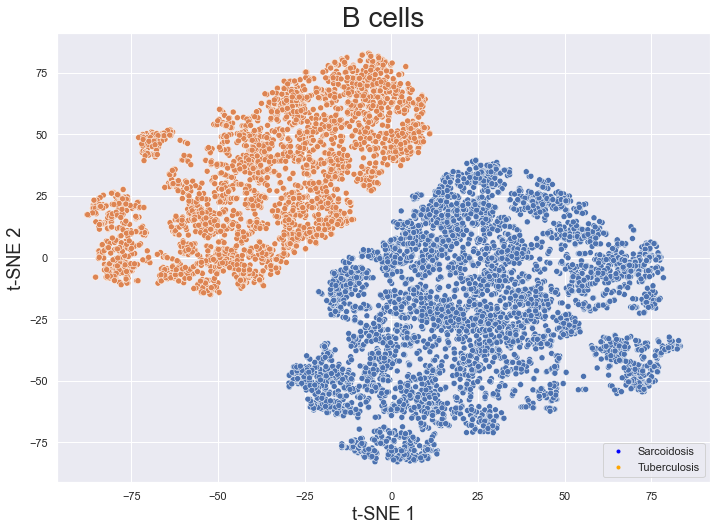

In [10]:
#plot B cell tsne with disease annotations
disease_bcell = Bcell_df['Disease']


ax = sns.scatterplot(B_cell_tsne[:,0], B_cell_tsne[:,1], hue=disease_bcell)

custom = [Line2D([], [], marker='.', color='blue', linestyle='None'),
          Line2D([], [], marker='.', color='orange', linestyle='None')]

ax.legend(custom, ['Sarcoidosis', 'Tuberculosis'], loc='lower right')

plt.xlabel('t-SNE 1', fontsize = 18)
plt.ylabel('t-SNE 2', fontsize = 18)
plt.title('B cells', fontsize = 28)
plt.savefig('figures/B_cell_tSNE.png')

In [ ]:
# np.savetxt("Bcell_tsne_v3", B_cell_tsne, delimiter=",")

In [12]:
#tsne - T cells
#default tsne settings used for all cell types: 
#2 components and 30 perplexity

tsne = TSNE()

T_cell_tsne = tsne.fit_transform(df_Tcell_num)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


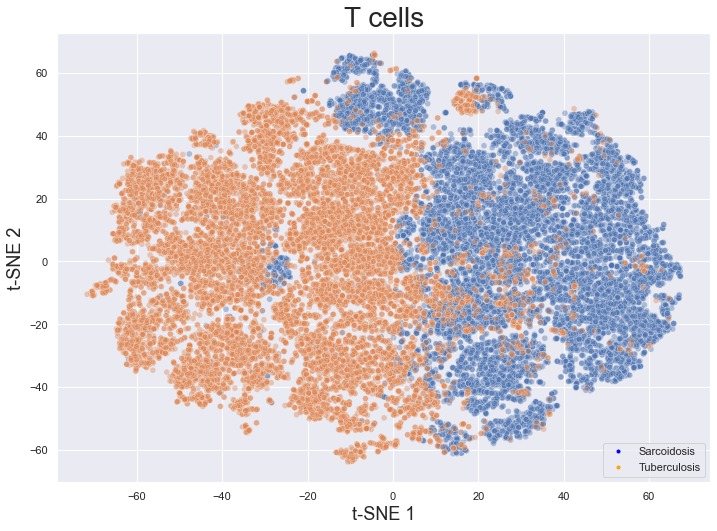

In [13]:
#plot T cell tsne with disease annotations

disease_tcell = Tcell_df['Disease']


ax = sns.scatterplot(T_cell_tsne[:,0], T_cell_tsne[:,1],alpha = 0.4, hue=disease_tcell)

custom = [Line2D([], [], marker='.', color='blue', linestyle='None'),
          Line2D([], [], marker='.', color='orange', linestyle='None')]

ax.legend(custom, ['Sarcoidosis', 'Tuberculosis'], loc='lower right')

plt.xlabel('t-SNE 1', fontsize = 18)
plt.ylabel('t-SNE 2', fontsize = 18)
plt.title('T cells', fontsize=28)
plt.savefig('figures/T_cell_tsne.png')

In [14]:
# np.savetxt("Tcell_tsne_v3", T_cell_tsne, delimiter=",")

In [15]:
#tsne - Endothelial cells

tsne = TSNE()

Endo_tsne = tsne.fit_transform(df_Endo_num)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


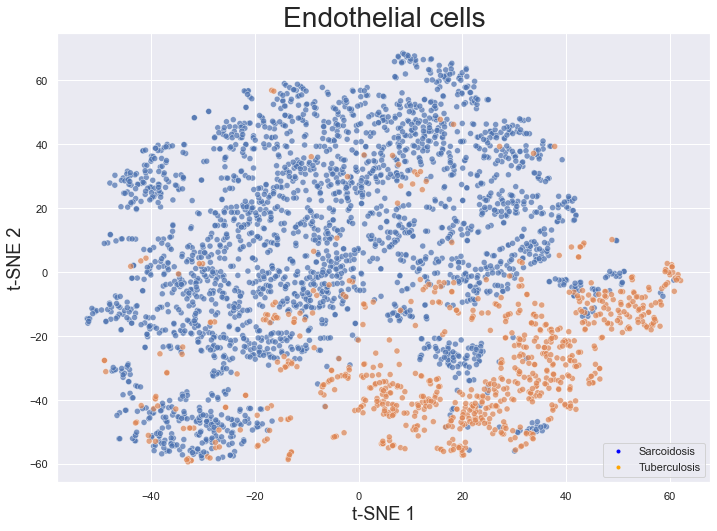

In [16]:
#plot of endothelial cell tsne with disease annotations

disease_endo_cell = Endo_df['Disease']

ax = sns.scatterplot(Endo_tsne[:,0], Endo_tsne[:,1],alpha = 0.7, hue=disease_endo_cell) 

custom = [Line2D([], [], marker='.', color='blue', linestyle='None'),
          Line2D([], [], marker='.', color='orange', linestyle='None')]

ax.legend(custom, ['Sarcoidosis', 'Tuberculosis'], loc='lower right')

plt.xlabel('t-SNE 1', fontsize =18)
plt.ylabel('t-SNE 2', fontsize=18)
plt.title('Endothelial cells', fontsize=28)
plt.savefig('figures/Endothelial_cell_tsne.png')

In [17]:
# np.savetxt("endo_cell_tsne_v3", Endo_tsne, delimiter=",")

In [18]:
#tsne - Moncytes

tsne = TSNE()

mono_tsne = tsne.fit_transform(df_mono_num)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


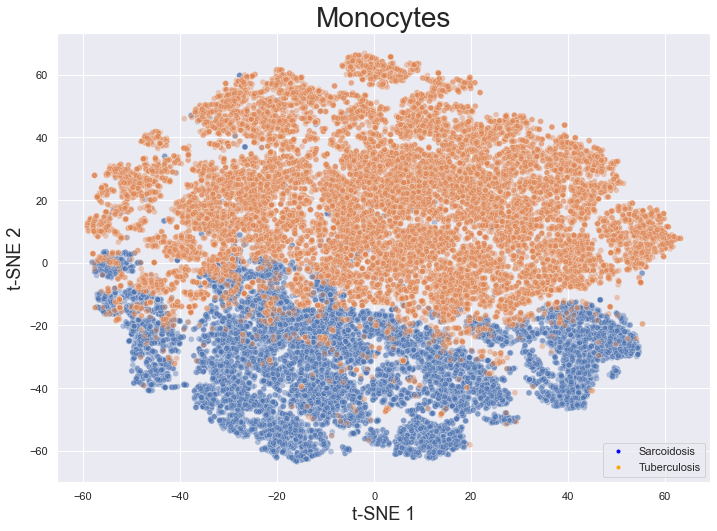

In [19]:
#Plot of monocyte tsne with disease annotations

disease_mono_cell = mono_df['Disease']

ax = sns.scatterplot(mono_tsne[:,0], mono_tsne[:,1],alpha=0.4, hue=disease_mono_cell)

custom = [Line2D([], [], marker='.', color='blue', linestyle='None'),
          Line2D([], [], marker='.', color='orange', linestyle='None')]

ax.legend(custom, ['Sarcoidosis', 'Tuberculosis'], loc='lower right')

plt.xlabel('t-SNE 1', fontsize=18)
plt.ylabel('t-SNE 2', fontsize=18)
plt.title('Monocytes', fontsize=28)
plt.savefig('figures/monocyte_tsne.png')

In [20]:
# np.savetxt("mono_tsne_v3", mono_tsne, delimiter=",")

In [21]:
#tsne - Macrophages

tsne = TSNE()

macro_tsne = tsne.fit_transform(df_macro_num)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


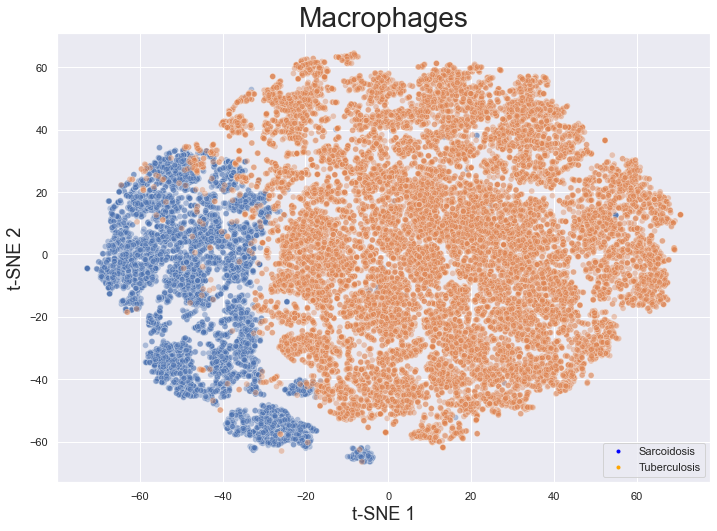

In [22]:
#plot of macrophage tsne with disease annotation

disease_macro_cell = macro_df['Disease']

ax = sns.scatterplot(macro_tsne[:,0], macro_tsne[:,1],alpha=0.4, hue=disease_macro_cell) 

custom = [Line2D([], [], marker='.', color='blue', linestyle='None'),
          Line2D([], [], marker='.', color='orange', linestyle='None')]

ax.legend(custom, ['Sarcoidosis', 'Tuberculosis'], loc='lower right')

plt.xlabel('t-SNE 1',fontsize=18)
plt.ylabel('t-SNE 2',fontsize=18)
plt.title('Macrophages', fontsize=28)
plt.savefig('figures/macrophage_tsne.png')

In [23]:
# np.savetxt("macro_tsne_v3", macro_tsne, delimiter=",")

In [24]:
#Clean up sarc and TB overlap data 
#display(TB_sarc_df)

df_TB_sarc = TB_sarc_df.iloc[:,3:30]

,HH3,VIM,SMA,CD4,CD14,Foxp3,CD31,PDL1,Ki67,CD206,...,CD16,IFNg,HLA.DR,CD11b,CD45,H3K9Ac,Keratin,MastChyTry,Ta,Au
0,0.765556,0.786841,0.0,0.660956,0.000000,0.0,0.823676,0.0,0.000000,0.0,...,0.000000,0.0,0.867836,0.456327,0.449009,0.591273,0.000000,0.0,0.014510,0.080456
1,0.881312,0.726815,0.0,0.308791,0.605867,0.0,0.539543,0.0,0.000000,0.0,...,0.567745,0.0,0.522764,0.000000,0.696227,0.798682,0.000000,0.0,0.068144,0.076104
2,0.839182,0.795838,0.0,0.564652,0.544975,0.0,0.000000,0.0,0.000000,0.0,...,0.610835,0.0,0.767920,0.000000,0.733090,0.733142,0.000000,0.0,0.000000,0.058582
3,0.797691,0.509005,0.0,0.253260,0.070368,0.0,0.000000,0.0,0.000000,0.0,...,0.283033,0.0,0.176124,0.000000,0.712187,0.736855,0.000000,0.0,0.036695,0.069880
4,0.910139,0.544552,0.0,0.710051,0.373022,0.0,0.012975,0.0,0.000000,0.0,...,0.306028,0.0,0.459801,0.045592,0.782226,0.896432,0.000000,0.0,0.066717,0.087015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120836,0.845022,0.333855,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.178715,0.0,0.000000,0.000000,0.000000,0.651944,0.000000,0.0,0.662771,0.941881
120837,0.904145,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.199415,0.0,...,0.676829,0.0,0.000000,0.000000,0.000000,0.737777,0.000000,0.0,0.526531,0.951828
120838,0.821165,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.428978,0.0,0.294402,0.000000,0.000000,0.721531,0.000000,0.0,0.591682,0.916732
120839,0.876541,0.000000,0.0,0.000000,0.417564,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.844523,0.000000,0.0,0.579611,0.908306


In [25]:
#sarc and TB tsne

tsne = TSNE()

TB_sarc_tsne = tsne.fit_transform(df_TB_sarc)

In [26]:
# np.savetxt("TB_sarc_tsne_v3", TB_sarc_tsne, delimiter=",")

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


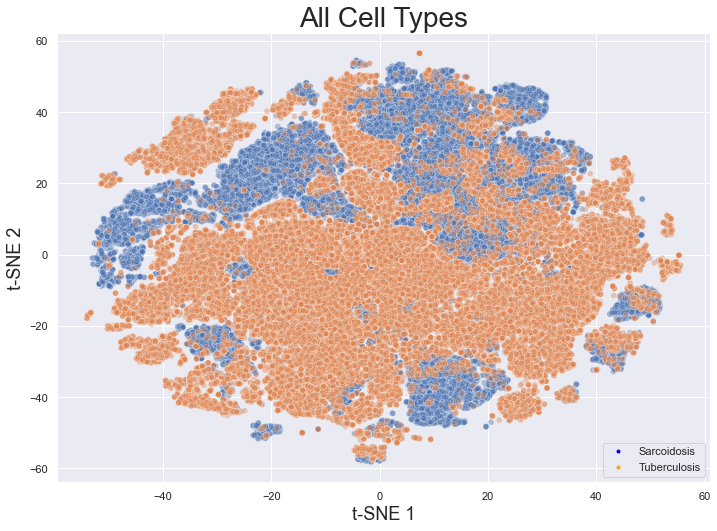

In [27]:
#sarc and TB tsne plot 
#disease annotations

TB_sarc_disease = TB_sarc_df['Disease']

ax = sns.scatterplot(TB_sarc_tsne[:,0], TB_sarc_tsne[:,1], alpha=0.4,hue=TB_sarc_disease) 

custom = [Line2D([], [], marker='.', color='blue', linestyle='None'),
          Line2D([], [], marker='.', color='orange', linestyle='None')]

ax.legend(custom, ['Sarcoidosis', 'Tuberculosis'], loc='lower right')

plt.xlabel('t-SNE 1', fontsize=18)
plt.ylabel('t-SNE 2', fontsize=18)
plt.title('All Cell Types', fontsize=28) 
plt.savefig('figures/all_cell_types_tsne.png')

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


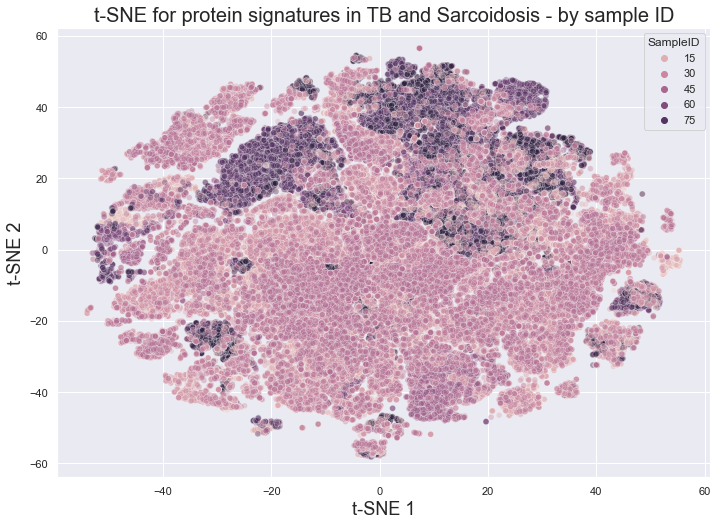

In [28]:
#scattplot of tnse data to color by sample ID in case there is a patient dependency in data 

TBsarc_sampleID = TB_sarc_df['SampleID']

sns.scatterplot(TB_sarc_tsne[:,0], TB_sarc_tsne[:,1],alpha=0.4, hue=TBsarc_sampleID) 

plt.xlabel('t-SNE 1', fontsize=18)
plt.ylabel('t-SNE 2', fontsize=18)
plt.title('t-SNE for protein signatures in TB and Sarcoidosis - by sample ID', fontsize=20)
plt.savefig('figures/sample_id_tsne.png')